In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [33]:
#brfss_total = pd.read_csv('./csv_data/brfss_total.csv')
brfss_total = pd.read_csv('./brfss_total.csv', index_col=0)

In [34]:
brfss_total.head()

,_STATE,DISPCODE,PHYSHLTH,MENTHLTH,USENOW3,HISPANC2,MARITAL,CHILDREN,EMPLOY,RENTHOM1,SEX,QLACTLM2,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,MSCODE,_IMPAGE,_RFHLTH,_SMOKER3,_PRACE,_EDUCAG,_INCOMG,_TOTINDA
0,5.0,110.0,0.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,53.0,1.0,4.0,1.0,3.0,5.0,1.0
1,5.0,110.0,15.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,5.0,64.0,2.0,3.0,1.0,2.0,2.0,1.0
2,5.0,110.0,6.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,58.0,1.0,4.0,1.0,3.0,2.0,1.0
3,5.0,110.0,30.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,76.0,2.0,4.0,1.0,1.0,0.0,2.0
4,5.0,110.0,13.0,0.0,3.0,2.0,3.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,82.0,2.0,3.0,1.0,2.0,0.0,2.0


In [35]:
brfss_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117555 entries, 0 to 117554
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    117555 non-null  float64
 1   DISPCODE  117555 non-null  float64
 2   PHYSHLTH  117555 non-null  float64
 3   MENTHLTH  117555 non-null  float64
 4   USENOW3   117555 non-null  float64
 5   HISPANC2  117555 non-null  float64
 6   MARITAL   117555 non-null  float64
 7   CHILDREN  117555 non-null  float64
 8   EMPLOY    117555 non-null  float64
 9   RENTHOM1  117555 non-null  float64
 10  SEX       117555 non-null  float64
 11  QLACTLM2  117555 non-null  float64
 12  ACEDEPRS  117555 non-null  float64
 13  ACEDRINK  117555 non-null  float64
 14  ACEDRUGS  117555 non-null  float64
 15  ACEPRISN  117555 non-null  float64
 16  ACEDIVRC  117555 non-null  float64
 17  ACEPUNCH  117555 non-null  float64
 18  ACEHURT   117555 non-null  float64
 19  ACESWEAR  117555 non-null  float64
 20  ACET

In [36]:
brfss_total.shape

(117555, 31)

In [37]:
# changing value to value labels for sex, race, education level, and income
brfss_total['SEX'] = brfss_total['SEX'].map({1:'Male', 2:'Female'})
brfss_total['_PRACE'] = brfss_total['_PRACE'].map({0:'Unknown', 1:'White', 2:'Black', 3:'Asian', 
                                                   4:'Native Hawaiian or Other Pacific Islander', 5:'American Indian or Alaskan Native', 6:'Other race'})
brfss_total['_EDUCAG'] = brfss_total['_EDUCAG'].map({0:'Unknown', 1:'Did not graduate high school', 
                                                     2:'Graduated high school', 3:'Attended college or technical school',
                                                     4: 'Graduated from College or Technical School'})
brfss_total['_INCOMG'] = brfss_total['_INCOMG'].map({0:'Unknown', 1:'Less than $15000', 2:'$15,000 to less than $25,000',
                                                     3:'$25,000 to less than $35,000', 4:'$35,000 to less than $50,000', 5:'$50,000 or more'})

In [38]:
brfss_total['SEX'].value_counts(normalize=True, ascending=False).to_frame()

,SEX
Female,0.602237
Male,0.397763


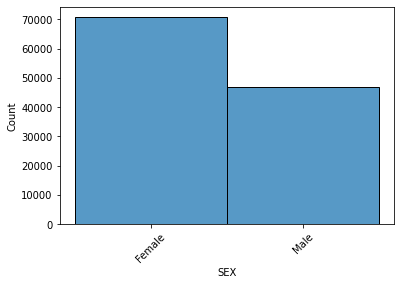

In [81]:
sns.histplot(brfss_total['SEX'])
plt.xticks(rotation=45);

In [40]:
brfss_total['_PRACE'].value_counts(normalize = True, ascending=False).to_frame()

,_PRACE
White,0.831730
Black,0.078006
Asian,0.031092
American Indian or Alaskan Native,0.019889
Other race,0.018893
Unknown,0.012292
Native Hawaiian or Other Pacific Islander,0.008098


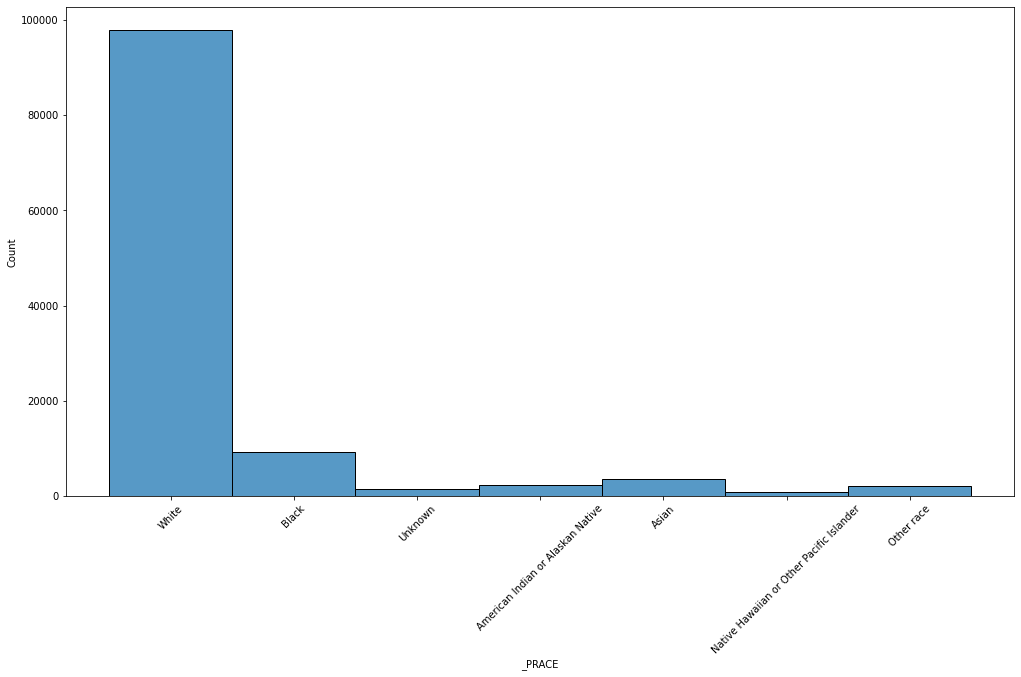

In [80]:
plt.figure(figsize=(17, 9))
sns.histplot(brfss_total['_PRACE'])
plt.xticks(rotation=45);

In [42]:
brfss_total.groupby('SEX')['_PRACE'].value_counts(normalize=True, ascending=False).to_frame()

_PRACE
SEX    _PRACE                                             
Female White                                      0.825739
       Black                                      0.087350
       Asian                                      0.031216
       American Indian or Alaskan Native          0.019620
       Other race                                 0.016555
       Unknown                                    0.011357
       Native Hawaiian or Other Pacific Islander  0.008164
Male   White                                      0.840801
       Black                                      0.063859
       Asian                                      0.030903
       Other race                                 0.022434
       American Indian or Alaskan Native          0.020296
       Unknown                                    0.013709
       Native Hawaiian or Other Pacific Islander  0.007998

In [43]:
brfss_total['_EDUCAG'].value_counts(normalize=True, ascending=False).to_frame()

,_EDUCAG
Graduated from College or Technical School,0.351920
Graduated high school,0.289983
Attended college or technical school,0.277623
Did not graduate high school,0.078533
Unknown,0.001940


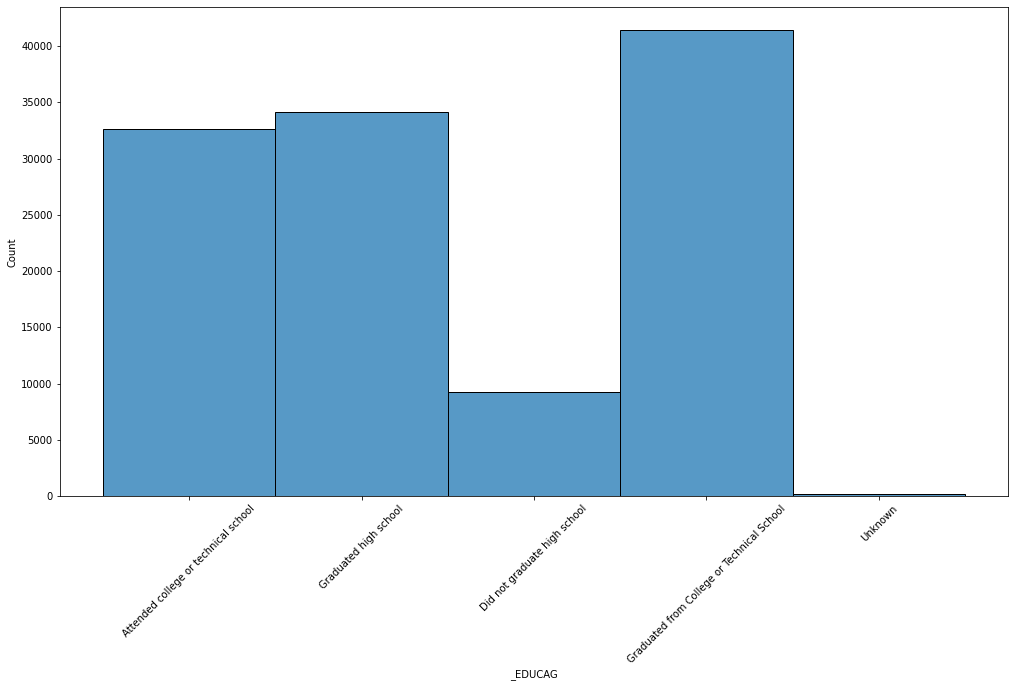

In [79]:
plt.figure(figsize=(17, 9))
sns.histplot(brfss_total['_EDUCAG'])
plt.xticks(rotation=45);

In [45]:
brfss_total.groupby('_EDUCAG')['_PRACE'].value_counts(normalize=True, ascending=False).to_frame()

_PRACE
_EDUCAG                                    _PRACE                                             
Attended college or technical school       White                                      0.841800
                                           Black                                      0.077338
                                           Asian                                      0.027914
                                           American Indian or Alaskan Native          0.021112
                                           Other race                                 0.014463
                                           Unknown                                    0.009315
                                           Native Hawaiian or Other Pacific Islander  0.008059
Did not graduate high school               White                                      0.671794
                                           Black                                      0.162695
                                           Other race                                 0.063475
                                           American Indian or Alaskan Native          0.046360
                                           Unknown                                    0.027730
                                           Asian                                      0.019606
                                           Native Hawaiian or Other Pacific Islander  0.008341
Graduated from College or Technical School White                                      0.865361
                                           Black                                      0.053686
                                           Asian                                      0.040778
                                           Other race                                 0.011917
                                           Unknown                                    0.011627
                                           American Indian or Alaskan Native          0.010902
                                           Native Hawaiian or Other Pacific Islander  0.005729
Graduated high school                      White                                      0.826454
                                           Black                                      0.084895
                                           Asian                                      0.025492
                                           American Indian or Alaskan Native          0.022500
                                           Other race                                 0.019390
                                           Native Hawaiian or Other Pacific Islander  0.011001
                                           Unknown                                    0.010267
Unknown                                    White                                      0.552632
                                           Unknown                                    0.236842
                                           Black                                      0.127193
                                           Other race                                 0.039474
                                           Asian                                      0.030702
                                           American Indian or Alaskan Native          0.013158

In [46]:
brfss_total['_INCOMG'].value_counts(normalize=True, ascending=False).to_frame()

,_INCOMG
"$50,000 or more",0.373868
"$15,000 to less than $25,000",0.156335
"$35,000 to less than $50,000",0.137110
Unknown,0.130024
"$25,000 to less than $35,000",0.111054
Less than $15000,0.091608


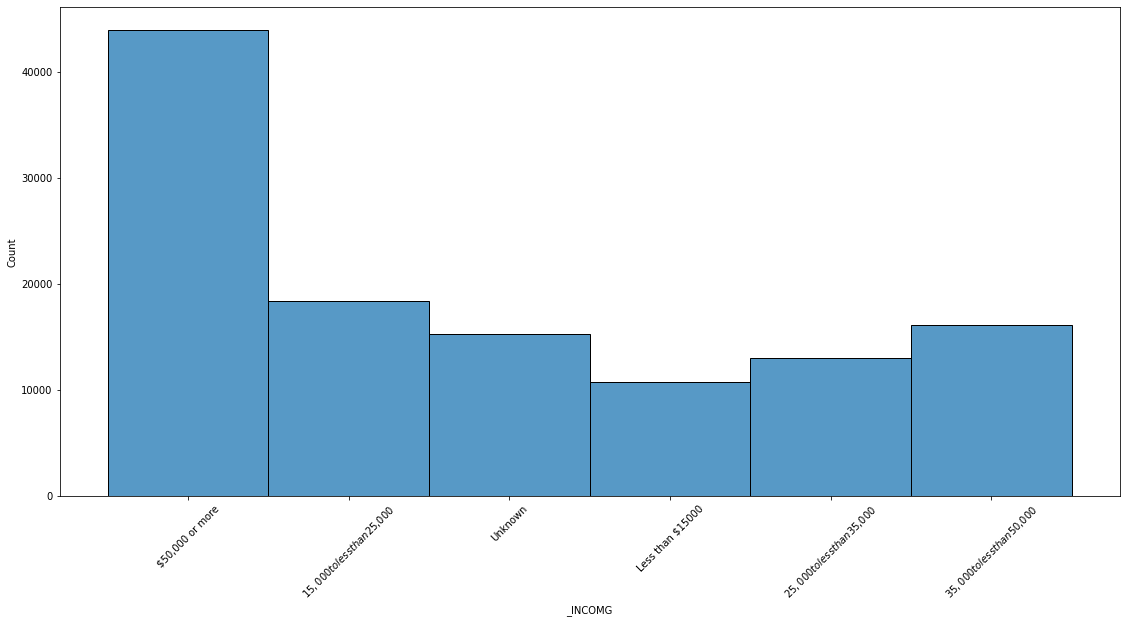

In [78]:
plt.figure(figsize=(19, 9))
sns.histplot(brfss_total['_INCOMG'])
plt.xticks(rotation=45);

In [48]:
brfss_total.groupby('_INCOMG')['_PRACE'].value_counts(normalize=True, ascending=False).to_frame()

_PRACE
_INCOMG                      _PRACE                                             
$15,000 to less than $25,000 White                                      0.774785
                             Black                                      0.115954
                             Other race                                 0.031233
                             American Indian or Alaskan Native          0.030090
                             Asian                                      0.023506
                             Unknown                                    0.015236
                             Native Hawaiian or Other Pacific Islander  0.009196
$25,000 to less than $35,000 White                                      0.821524
                             Black                                      0.086633
                             Asian                                      0.030103
                             Other race                                 0.021754
                             American Indian or Alaskan Native          0.021601
                             Unknown                                    0.010034
                             Native Hawaiian or Other Pacific Islander  0.008349
$35,000 to less than $50,000 White                                      0.854510
                             Black                                      0.064028
                             Asian                                      0.031269
                             American Indian or Alaskan Native          0.016193
                             Other race                                 0.015821
                             Unknown                                    0.009306
                             Native Hawaiian or Other Pacific Islander  0.008872
$50,000 or more              White                                      0.884369
                             Black                                      0.041365
                             Asian                                      0.038294
                             American Indian or Alaskan Native          0.010512
                             Other race                                 0.010512
                             Native Hawaiian or Other Pacific Islander  0.007918
                             Unknown                                    0.007031
Less than $15000             White                                      0.708051
                             Black                                      0.169932
                             American Indian or Alaskan Native          0.047172
                             Other race                                 0.029529
                             Asian                                      0.023958
                             Unknown                                    0.012536
                             Native Hawaiian or Other Pacific Islander  0.008822
Unknown                      White                                      0.820674
                             Black                                      0.080340
                             Unknown                                    0.028786
                             Asian                                      0.025188
                             Other race                                 0.021459
                             American Indian or Alaskan Native          0.017795
                             Native Hawaiian or Other Pacific Islander  0.005757

In [49]:
# want to see which states are included by checking their values
brfss_total['_STATE'].value_counts(normalize=True)

53.0    0.118642
27.0    0.118489
55.0    0.114015
50.0    0.113555
37.0    0.093684
30.0    0.079231
22.0    0.071601
47.0    0.058832
19.0    0.054119
15.0    0.053167
40.0    0.031449
5.0     0.031313
11.0    0.031296
32.0    0.030607
Name: _STATE, dtype: float64

In [50]:
# changing value to value labels for states
brfss_total['_STATE'] = brfss_total['_STATE'].map({53:'Washington', 27:'Minnesota', 55:'Wisconsin', 50:'Vermont', 
                                                   37:'North Carolina', 30:'Montana', 22:'Louisiana', 47:'Tennessee',
                                                   19:'Iowa', 15:'Hawaii', 40:'Oklahoma', 5:'Arkansas', 
                                                   11:'District of Columbia', 32:'Nevada'})

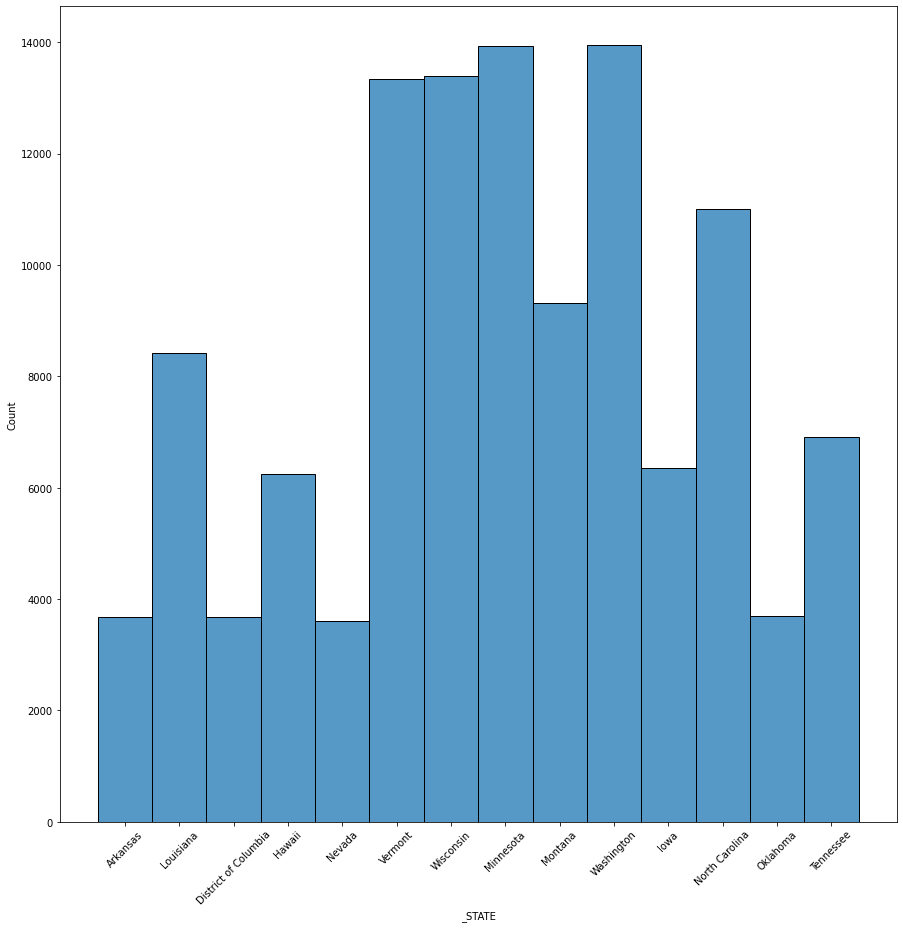

In [77]:
plt.figure(figsize=(15, 15))
sns.histplot(brfss_total['_STATE'])
plt.xticks(rotation=45);

In [52]:
# creating a separate ACE dataset for analysis
ace = brfss_total[['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT', 'ACESWEAR', 
                       'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']]

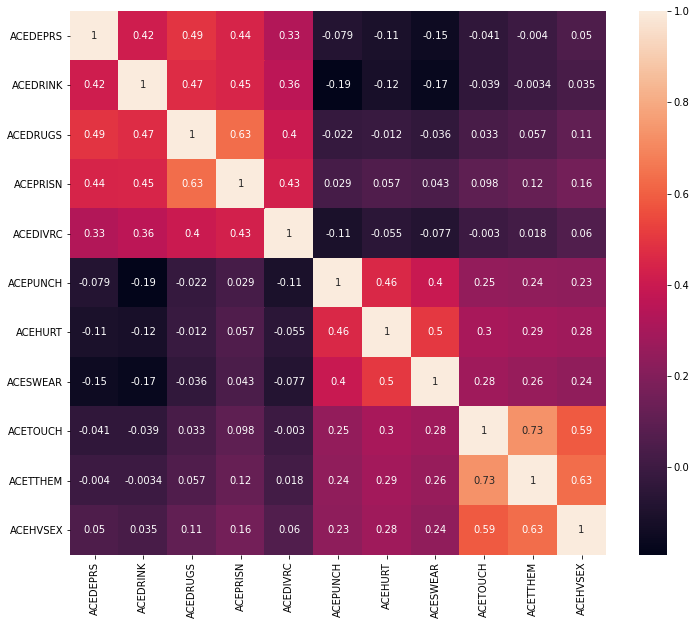

In [53]:
plt.figure(figsize=(12, 10))
sns.heatmap(ace.corr(), annot=True);

In [54]:
# updating ACE columns to be a count depending on the question
# first 5 questions are yes or no, so yes will be be counted as 1 and no will be counted as 0
# last 6 are questions of frequency, never = 0, once = 1, more than once = 2 (since not given an exact number)
ace['ACEDEPRS'] = ace['ACEDEPRS'].map({1:1, 2:0, 0:0})
ace['ACEDRINK'] = ace['ACEDRINK'].map({1:1, 2:0, 0:0})
ace['ACEDRUGS'] = ace['ACEDRUGS'].map({1:1, 2:0, 0:0})
ace['ACEPRISN'] = ace['ACEPRISN'].map({1:1, 2:0, 0:0})
ace['ACEDIVRC'] = ace['ACEDIVRC'].map({1:1, 2:0, 0:0})
ace['ACEPUNCH'] = ace['ACEPUNCH'].map({1:0, 2:1, 3:2, 0:0})
ace['ACEHURT'] = ace['ACEHURT'].map({1:0, 2:1, 3:2, 0:0})
ace['ACESWEAR'] = ace['ACESWEAR'].map({1:0, 2:1, 3:2, 0:0})
ace['ACETOUCH'] = ace['ACETOUCH'].map({1:0, 2:1, 3:2, 0:0})
ace['ACETTHEM'] = ace['ACETTHEM'].map({1:0, 2:1, 3:2, 0:0})
ace['ACEHVSEX'] = ace['ACEHVSEX'].map({1:0, 2:1, 3:2, 0:0})


# creating a column for counting the number of ACEs an individual had
ace['ACE_Count'] = ace.sum(axis = 1)
brfss_total['ACE_Count'] = ace['ACE_Count']
# put in EDA notebook and create visualization(s)
ace['ACE_Count'].value_counts(normalize=True, ascending=False).to_frame()

,ACE_Count
0,0.430284
1,0.162409
2,0.113283
3,0.070818
4,0.053711
5,0.039803
6,0.031526
7,0.025511
8,0.020450
9,0.014359


In [55]:
# changing value to value labels for ACE questions
brfss_total['ACEDEPRS'] = brfss_total['ACEDEPRS'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEDRINK'] = brfss_total['ACEDRINK'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEDRUGS'] = brfss_total['ACEDRUGS'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEPRISN'] = brfss_total['ACEPRISN'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEDIVRC'] = brfss_total['ACEDIVRC'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEPUNCH'] = brfss_total['ACEPUNCH'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACEHURT'] = brfss_total['ACEHURT'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACESWEAR'] = brfss_total['ACESWEAR'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACETOUCH'] = brfss_total['ACETOUCH'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACETTHEM'] = brfss_total['ACETTHEM'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACEHVSEX'] = brfss_total['ACEHVSEX'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})

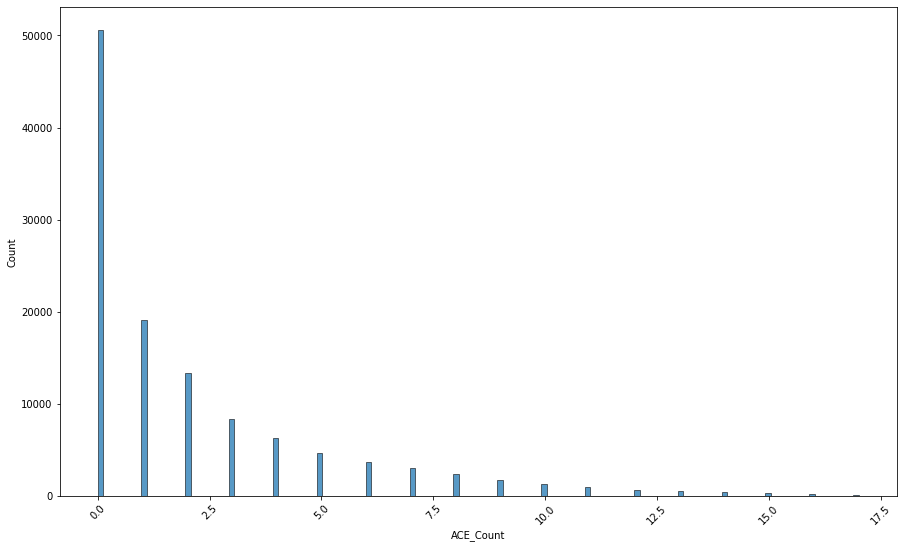

In [82]:
plt.figure(figsize=(15, 9))
sns.histplot(brfss_total['ACE_Count'])
plt.xticks(rotation=45);

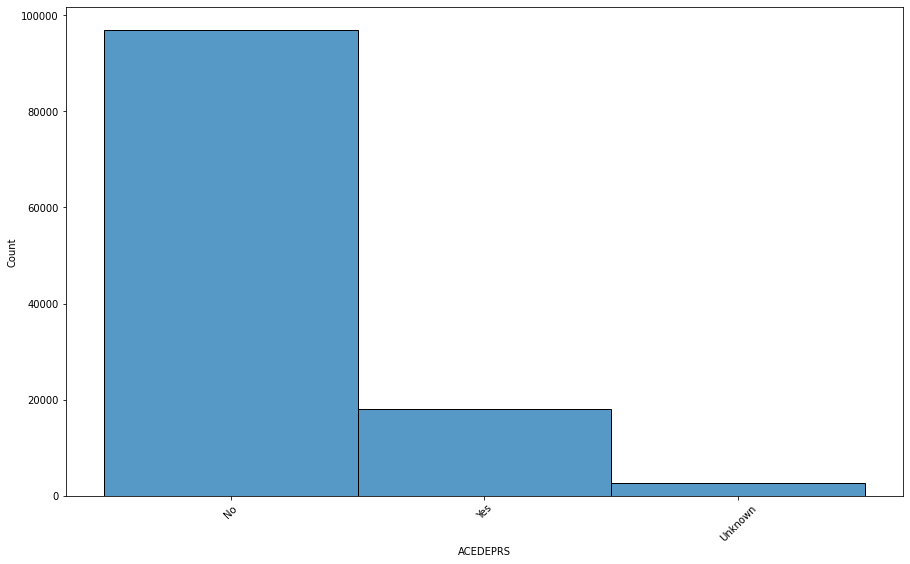

In [83]:
plt.figure(figsize=(15, 9))
sns.histplot(brfss_total['ACEDEPRS'])
plt.xticks(rotation=45);

In [56]:
# got guidance for this from https://re-thought.com/pandas-value_counts/
brfss_total.groupby('_STATE')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
_STATE               ACEDEPRS          
Arkansas             No        0.858462
                     Yes       0.134474
                     Unknown   0.007063
District of Columbia No        0.822506
                     Yes       0.159554
                     Unknown   0.017940
Hawaii               No        0.862720
                     Yes       0.128640
                     Unknown   0.008640
Iowa                 No        0.836372
                     Yes       0.151996
                     Unknown   0.011632
Louisiana            No        0.827017
                     Yes       0.151004
                     Unknown   0.021979
Minnesota            No        0.822241
                     Yes       0.157441
                     Unknown   0.020317
Montana              No        0.825854
                     Yes       0.163625
                     Unknown   0.010522
Nevada               No        0.810728
                     Yes       0.177599
                     Unknown   0.011673
North Carolina       No        0.846636
                     Yes       0.138927
                     Unknown   0.014437
Oklahoma             No        0.843928
                     Yes       0.147417
                     Unknown   0.008656
Tennessee            No        0.686235
                     Unknown   0.178571
                     Yes       0.135194
Vermont              No        0.815192
                     Yes       0.172822
                     Unknown   0.011986
Washington           No        0.810569
                     Yes       0.181114
                     Unknown   0.008317
Wisconsin            No        0.866672
                     Yes       0.124450
                     Unknown   0.008879

In [12]:
brfss_total.groupby('_PRACE')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
_PRACE                                    ACEDEPRS          
American Indian or Alaskan Native         No        0.799401
                                          Yes       0.184773
                                          Unknown   0.015825
Asian                                     No        0.916553
                                          Yes       0.067579
                                          Unknown   0.015869
Black                                     No        0.856489
                                          Yes       0.100545
                                          Unknown   0.042966
Native Hawaiian or Other Pacific Islander No        0.853992
                                          Yes       0.136555
                                          Unknown   0.009454
Other race                                No        0.837911
                                          Yes       0.147231
                                          Unknown   0.014858
Unknown                                   No        0.789619
                                          Yes       0.158478
                                          Unknown   0.051903
White                                     No        0.818490
                                          Yes       0.160615
                                          Unknown   0.020895

In [13]:
brfss_total.groupby('SEX')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
SEX    ACEDEPRS          
Female No        0.803859
       Yes       0.173357
       Unknown   0.022784
Male   No        0.855557
       Yes       0.122287
       Unknown   0.022156

In [14]:
brfss_total.groupby('_EDUCAG')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
_EDUCAG                                    ACEDEPRS          
Attended college or technical school       No        0.811527
                                           Yes       0.168158
                                           Unknown   0.020315
Did not graduate high school               No        0.828531
                                           Yes       0.128466
                                           Unknown   0.043003
Graduated from College or Technical School No        0.810225
                                           Yes       0.172565
                                           Unknown   0.017211
Graduated high school                      No        0.853677
                                           Yes       0.122063
                                           Unknown   0.024260
Unknown                                    No        0.706140
                                           Unknown   0.219298
                                           Yes       0.074561

In [15]:
brfss_total.groupby('_INCOMG')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
_INCOMG                      ACEDEPRS          
$15,000 to less than $25,000 No        0.825117
                             Yes       0.153825
                             Unknown   0.021058
$25,000 to less than $35,000 No        0.839755
                             Yes       0.140789
                             Unknown   0.019456
$35,000 to less than $50,000 No        0.836394
                             Yes       0.148964
                             Unknown   0.014642
$50,000 or more              No        0.825870
                             Yes       0.162025
                             Unknown   0.012105
Less than $15000             No        0.770452
                             Yes       0.195376
                             Unknown   0.034172
Unknown                      No        0.831730
                             Yes       0.111220
                             Unknown   0.057049

In [91]:
brfss_total.groupby('_STATE')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
_STATE               ACEDRINK          
Arkansas             No        0.786471
                     Yes       0.207824
                     Unknown   0.005705
District of Columbia No        0.788529
                     Yes       0.201957
                     Unknown   0.009513
Hawaii               No        0.791520
                     Yes       0.202560
                     Unknown   0.005920
Iowa                 No        0.782458
                     Yes       0.208582
                     Unknown   0.008959
Louisiana            No        0.765237
                     Yes       0.217180
                     Unknown   0.017583
Minnesota            No        0.751669
                     Yes       0.230957
                     Unknown   0.017374
Montana              No        0.716556
                     Yes       0.276680
                     Unknown   0.006764
Nevada               No        0.699833
                     Yes       0.293496
                     Unknown   0.006670
North Carolina       No        0.762099
                     Yes       0.225824
                     Unknown   0.012077
Oklahoma             No        0.773600
                     Yes       0.219638
                     Unknown   0.006762
Tennessee            No        0.608444
                     Yes       0.215442
                     Unknown   0.176113
Vermont              No        0.744251
                     Yes       0.247509
                     Unknown   0.008240
Washington           No        0.736933
                     Yes       0.257833
                     Unknown   0.005234
Wisconsin            No        0.776841
                     Yes       0.216593
                     Unknown   0.006566

In [16]:
brfss_total.groupby('_PRACE')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
_PRACE                                    ACEDRINK          
American Indian or Alaskan Native         No        0.612062
                                          Yes       0.374251
                                          Unknown   0.013687
Asian                                     No        0.885910
                                          Yes       0.104514
                                          Unknown   0.009576
Black                                     No        0.747219
                                          Yes       0.215376
                                          Unknown   0.037405
Native Hawaiian or Other Pacific Islander No        0.720588
                                          Yes       0.273109
                                          Unknown   0.006303
Other race                                No        0.729401
                                          Yes       0.259343
                                          Unknown   0.011256
Unknown                                   No        0.707958
                                          Yes       0.247751
                                          Unknown   0.044291
White                                     No        0.747233
                                          Yes       0.234674
                                          Unknown   0.018093

In [17]:
brfss_total.groupby('SEX')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
SEX    ACEDRINK          
Female No        0.732739
       Yes       0.247443
       Unknown   0.019818
Male   No        0.770654
       Yes       0.210719
       Unknown   0.018627

In [18]:
brfss_total.groupby('_EDUCAG')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
_EDUCAG                                    ACEDRINK          
Attended college or technical school       No        0.730512
                                           Yes       0.252604
                                           Unknown   0.016883
Did not graduate high school               No        0.685550
                                           Yes       0.277621
                                           Unknown   0.036828
Graduated from College or Technical School No        0.784336
                                           Yes       0.201160
                                           Unknown   0.014503
Graduated high school                      No        0.737452
                                           Yes       0.240957
                                           Unknown   0.021591
Unknown                                    No        0.671053
                                           Unknown   0.206140
                                           Yes       0.122807

In [19]:
brfss_total.groupby('_INCOMG')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
_INCOMG                      ACEDRINK          
$15,000 to less than $25,000 No        0.728861
                             Yes       0.252857
                             Unknown   0.018283
$25,000 to less than $35,000 No        0.746304
                             Yes       0.237380
                             Unknown   0.016316
$35,000 to less than $50,000 No        0.756049
                             Yes       0.232473
                             Unknown   0.011478
$50,000 or more              No        0.766712
                             Yes       0.223299
                             Unknown   0.009989
Less than $15000             No        0.668679
                             Yes       0.304021
                             Unknown   0.027301
Unknown                      No        0.764671
                             Yes       0.182532
                             Unknown   0.052797

In [92]:
brfss_total.groupby('_STATE')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
_STATE               ACEDRUGS          
Arkansas             No        0.935615
                     Yes       0.059223
                     Unknown   0.005162
District of Columbia No        0.904594
                     Yes       0.086437
                     Unknown   0.008970
Hawaii               No        0.912320
                     Yes       0.082720
                     Unknown   0.004960
Iowa                 No        0.922980
                     Yes       0.067903
                     Unknown   0.009117
Louisiana            No        0.904360
                     Yes       0.076749
                     Unknown   0.018890
Minnesota            No        0.904803
                     Yes       0.078326
                     Unknown   0.016871
Montana              No        0.912605
                     Yes       0.082027
                     Unknown   0.005368
Nevada               No        0.880767
                     Yes       0.111173
                     Unknown   0.008060
North Carolina       No        0.909561
                     Yes       0.078725
                     Unknown   0.011713
Oklahoma             No        0.904788
                     Yes       0.087639
                     Unknown   0.007574
Tennessee            No        0.753470
                     Unknown   0.177848
                     Yes       0.068681
Vermont              No        0.927635
                     Yes       0.065323
                     Unknown   0.007042
Washington           No        0.910303
                     Yes       0.084319
                     Unknown   0.005378
Wisconsin            No        0.928822
                     Yes       0.066328
                     Unknown   0.004850

In [20]:
brfss_total.groupby('_PRACE')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
_PRACE                                    ACEDRUGS          
American Indian or Alaskan Native         No        0.851583
                                          Yes       0.136441
                                          Unknown   0.011976
Asian                                     No        0.955951
                                          Yes       0.034747
                                          Unknown   0.009302
Black                                     No        0.854526
                                          Yes       0.106761
                                          Unknown   0.038713
Native Hawaiian or Other Pacific Islander No        0.846639
                                          Yes       0.146008
                                          Unknown   0.007353
Other race                                No        0.885187
                                          Yes       0.104457
                                          Unknown   0.010356
Unknown                                   No        0.875433
                                          Yes       0.082353
                                          Unknown   0.042215
White                                     No        0.909986
                                          Yes       0.072351
                                          Unknown   0.017663

In [21]:
brfss_total.groupby('SEX')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
SEX    ACEDRUGS          
Female No        0.905814
       Yes       0.074439
       Unknown   0.019747
Male   No        0.902564
       Yes       0.079535
       Unknown   0.017900

In [22]:
brfss_total.groupby('_EDUCAG')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
_EDUCAG                                    ACEDRUGS          
Attended college or technical school       No        0.892113
                                           Yes       0.090023
                                           Unknown   0.017864
Did not graduate high school               No        0.865360
                                           Yes       0.097920
                                           Unknown   0.036720
Graduated from College or Technical School No        0.924559
                                           Yes       0.062098
                                           Unknown   0.013343
Graduated high school                      No        0.903605
                                           Yes       0.075362
                                           Unknown   0.021033
Unknown                                    No        0.767544
                                           Unknown   0.192982
                                           Yes       0.039474

In [23]:
brfss_total.groupby('_INCOMG')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
_INCOMG                      ACEDRUGS          
$15,000 to less than $25,000 No        0.895038
                             Yes       0.087442
                             Unknown   0.017521
$25,000 to less than $35,000 No        0.912064
                             Yes       0.071773
                             Unknown   0.016162
$35,000 to less than $50,000 No        0.917173
                             Yes       0.070977
                             Unknown   0.011850
$50,000 or more              No        0.916314
                             Yes       0.074266
                             Unknown   0.009420
Less than $15000             No        0.858483
                             Yes       0.113195
                             Unknown   0.028322
Unknown                      No        0.894668
                             Yes       0.053517
                             Unknown   0.051816

In [93]:
brfss_total.groupby('_STATE')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
_STATE               ACEPRISN          
Arkansas             No        0.955447
                     Yes       0.040750
                     Unknown   0.003803
District of Columbia No        0.930959
                     Yes       0.063876
                     Unknown   0.005164
Hawaii               No        0.950560
                     Yes       0.045600
                     Unknown   0.003840
Iowa                 No        0.949230
                     Yes       0.043383
                     Unknown   0.007388
Louisiana            No        0.933943
                     Yes       0.050018
                     Unknown   0.016039
Minnesota            No        0.939479
                     Yes       0.046019
                     Unknown   0.014502
Montana              No        0.943526
                     Yes       0.051750
                     Unknown   0.004724
Nevada               No        0.934130
                     Yes       0.060589
                     Unknown   0.005281
North Carolina       No        0.927359
                     Yes       0.063107
                     Unknown   0.009534
Oklahoma             No        0.932378
                     Yes       0.061672
                     Unknown   0.005951
Tennessee            No        0.762724
                     Unknown   0.176692
                     Yes       0.060584
Vermont              No        0.964567
                     Yes       0.031913
                     Unknown   0.003521
Washington           No        0.950455
                     Yes       0.047179
                     Unknown   0.002366
Wisconsin            No        0.947624
                     Yes       0.048571
                     Unknown   0.003805

In [24]:
brfss_total.groupby('_PRACE')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
_PRACE                                    ACEPRISN          
American Indian or Alaskan Native         No        0.843456
                                          Yes       0.144996
                                          Unknown   0.011548
Asian                                     No        0.969083
                                          Yes       0.022161
                                          Unknown   0.008755
Black                                     No        0.852890
                                          Yes       0.111450
                                          Unknown   0.035660
Native Hawaiian or Other Pacific Islander No        0.901261
                                          Yes       0.090336
                                          Unknown   0.008403
Other race                                No        0.921657
                                          Yes       0.067987
                                          Unknown   0.010356
Unknown                                   No        0.911419
                                          Yes       0.052595
                                          Unknown   0.035986
White                                     No        0.943288
                                          Yes       0.041218
                                          Unknown   0.015495

In [25]:
brfss_total.groupby('SEX')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
SEX    ACEPRISN          
Female No        0.935816
       Yes       0.046698
       Unknown   0.017487
Male   No        0.931029
       Yes       0.053017
       Unknown   0.015954

In [26]:
brfss_total.groupby('_EDUCAG')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
_EDUCAG                                    ACEPRISN          
Attended college or technical school       No        0.929250
                                           Yes       0.055276
                                           Unknown   0.015474
Did not graduate high school               No        0.862868
                                           Yes       0.102145
                                           Unknown   0.034987
Graduated from College or Technical School No        0.963355
                                           Yes       0.025695
                                           Unknown   0.010950
Graduated high school                      No        0.922790
                                           Yes       0.057819
                                           Unknown   0.019390
Unknown                                    No        0.798246
                                           Unknown   0.184211
                                           Yes       0.017544

In [27]:
brfss_total.groupby('_INCOMG')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
_INCOMG                      ACEPRISN          
$15,000 to less than $25,000 No        0.912504
                             Yes       0.070846
                             Unknown   0.016650
$25,000 to less than $35,000 No        0.932440
                             Yes       0.052624
                             Unknown   0.014937
$35,000 to less than $50,000 No        0.948133
                             Yes       0.042747
                             Unknown   0.009120
$50,000 or more              No        0.960819
                             Yes       0.031559
                             Unknown   0.007622
Less than $15000             No        0.880583
                             Yes       0.095088
                             Unknown   0.024329
Unknown                      No        0.906117
                             Unknown   0.048348
                             Yes       0.045535

In [94]:
brfss_total.groupby('_STATE')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
_STATE               ACEDIVRC          
Arkansas             No        0.785656
                     Yes       0.204021
                     Unknown   0.010323
District of Columbia No        0.729818
                     Yes       0.240283
                     Unknown   0.029899
Hawaii               No        0.802240
                     Yes       0.190240
                     Unknown   0.007520
Iowa                 No        0.824898
                     Yes       0.164414
                     Unknown   0.010688
Louisiana            No        0.754069
                     Yes       0.216704
                     Unknown   0.029227
Minnesota            No        0.804652
                     Yes       0.171441
                     Unknown   0.023907
Montana              No        0.773459
                     Yes       0.218381
                     Unknown   0.008160
Nevada               No        0.700389
                     Yes       0.287104
                     Unknown   0.012507
North Carolina       No        0.744030
                     Yes       0.227912
                     Unknown   0.028058
Oklahoma             No        0.731674
                     Yes       0.252908
                     Unknown   0.015418
Tennessee            No        0.604396
                     Yes       0.200983
                     Unknown   0.194621
Vermont              No        0.807551
                     Yes       0.184358
                     Unknown   0.008090
Washington           No        0.759518
                     Yes       0.230587
                     Unknown   0.009895
Wisconsin            No        0.801835
                     Yes       0.186078
                     Unknown   0.012087

In [28]:
brfss_total.groupby('_PRACE')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
_PRACE                                    ACEDIVRC          
American Indian or Alaskan Native         No        0.636869
                                          Yes       0.331908
                                          Unknown   0.031223
Asian                                     No        0.891655
                                          Yes       0.099042
                                          Unknown   0.009302
Black                                     No        0.568375
                                          Yes       0.342748
                                          Unknown   0.088877
Native Hawaiian or Other Pacific Islander No        0.701681
                                          Yes       0.274160
                                          Unknown   0.024160
Other race                                No        0.719496
                                          Yes       0.251688
                                          Unknown   0.028816
Unknown                                   No        0.694118
                                          Yes       0.244291
                                          Unknown   0.061592
White                                     No        0.788430
                                          Yes       0.191268
                                          Unknown   0.020302

In [29]:
brfss_total.groupby('SEX')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
SEX    ACEDIVRC          
Female No        0.763715
       Yes       0.207935
       Unknown   0.028349
Male   No        0.775230
       Yes       0.201758
       Unknown   0.023012

In [30]:
brfss_total.groupby('_EDUCAG')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
_EDUCAG                                    ACEDIVRC          
Attended college or technical school       No        0.747579
                                           Yes       0.227693
                                           Unknown   0.024727
Did not graduate high school               No        0.670277
                                           Yes       0.272097
                                           Unknown   0.057626
Graduated from College or Technical School No        0.826662
                                           Yes       0.157626
                                           Unknown   0.015712
Graduated high school                      No        0.744844
                                           Yes       0.224471
                                           Unknown   0.030684
Unknown                                    No        0.618421
                                           Unknown   0.210526
                                           Yes       0.171053

In [31]:
brfss_total.groupby('_INCOMG')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
_INCOMG                      ACEDIVRC          
$15,000 to less than $25,000 No        0.734955
                             Yes       0.234520
                             Unknown   0.030526
$25,000 to less than $35,000 No        0.764381
                             Yes       0.211107
                             Unknown   0.024512
$35,000 to less than $50,000 No        0.785954
                             Yes       0.197605
                             Unknown   0.016441
$50,000 or more              No        0.803982
                             Yes       0.184164
                             Unknown   0.011854
Less than $15000             No        0.666357
                             Yes       0.287399
                             Unknown   0.046244
Unknown                      No        0.762316
                             Yes       0.177625
                             Unknown   0.060059

In [95]:
brfss_total.groupby('_STATE')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
_STATE               ACEPUNCH                
Arkansas             Never           0.840261
                     More than once  0.107851
                     Once            0.033958
                     Unknown         0.017930
District of Columbia Never           0.826583
                     More than once  0.100027
                     Once            0.049742
                     Unknown         0.023648
Hawaii               Never           0.821120
                     More than once  0.116640
                     Once            0.046560
                     Unknown         0.015680
Iowa                 Never           0.846746
                     More than once  0.102012
                     Once            0.035052
                     Unknown         0.016190
Louisiana            Never           0.835690
                     More than once  0.102887
                     Unknown         0.031840
                     Once            0.029583
Minnesota            Never           0.840764
                     More than once  0.094766
                     Once            0.037691
                     Unknown         0.026779
Montana              Never           0.823706
                     More than once  0.127443
                     Once            0.029740
                     Unknown         0.019111
Nevada               Never           0.790439
                     More than once  0.143135
                     Once            0.045581
                     Unknown         0.020845
North Carolina       Never           0.818396
                     More than once  0.118133
                     Once            0.037501
                     Unknown         0.025969
Oklahoma             Never           0.821206
                     More than once  0.126860
                     Once            0.034082
                     Unknown         0.017852
Tennessee            Never           0.664546
                     Unknown         0.192452
                     More than once  0.111191
                     Once            0.031810
Vermont              Never           0.847629
                     More than once  0.099858
                     Once            0.037831
                     Unknown         0.014683
Washington           Never           0.820965
                     More than once  0.120169
                     Once            0.047179
                     Unknown         0.011687
Wisconsin            Never           0.831829
                     More than once  0.106021
                     Once            0.045214
                     Unknown         0.016937

In [32]:
brfss_total.groupby('_PRACE')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
_PRACE                                    ACEPUNCH                
American Indian or Alaskan Native         Never           0.685629
                                          More than once  0.221985
                                          Once            0.054748
                                          Unknown         0.037639
Asian                                     Never           0.862380
                                          More than once  0.073598
                                          Once            0.042408
                                          Unknown         0.021614
Black                                     Never           0.740567
                                          More than once  0.147655
                                          Unknown         0.060960
                                          Once            0.050818
Native Hawaiian or Other Pacific Islander Never           0.688025
                                          More than once  0.199580
                                          Once            0.080882
                                          Unknown         0.031513
Other race                                Never           0.742909
                                          More than once  0.166592
                                          Once            0.059883
                                          Unknown         0.030617
Unknown                                   Never           0.757093
                                          More than once  0.135640
                                          Unknown         0.066436
                                          Once            0.040830
White                                     Never           0.833841
                                          More than once  0.103320
                                          Once            0.036278
                                          Unknown         0.026561

In [33]:
brfss_total.groupby('SEX')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
SEX    ACEPUNCH                
Female Never           0.816105
       More than once  0.116320
       Once            0.037516
       Unknown         0.030058
Male   Never           0.827563
       More than once  0.101906
       Once            0.040826
       Unknown         0.029706

In [34]:
brfss_total.groupby('_EDUCAG')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
_EDUCAG                                    ACEPUNCH                
Attended college or technical school       Never           0.808432
                                           More than once  0.123575
                                           Once            0.041151
                                           Unknown         0.026842
Did not graduate high school               Never           0.725737
                                           More than once  0.167461
                                           Unknown         0.061525
                                           Once            0.045277
Graduated from College or Technical School Never           0.865990
                                           More than once  0.079937
                                           Once            0.035219
                                           Unknown         0.018854
Graduated high school                      Never           0.803632
                                           More than once  0.120273
                                           Once            0.039485
                                           Unknown         0.036610
Unknown                                    Never           0.736842
                                           Unknown         0.197368
                                           More than once  0.061404
                                           Once            0.004386

In [35]:
brfss_total.groupby('_INCOMG')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
_INCOMG                      ACEPUNCH                
$15,000 to less than $25,000 Never           0.792959
                             More than once  0.133312
                             Once            0.041245
                             Unknown         0.032484
$25,000 to less than $35,000 Never           0.818231
                             More than once  0.111375
                             Once            0.041823
                             Unknown         0.028571
$35,000 to less than $50,000 Never           0.829756
                             More than once  0.110125
                             Once            0.040079
                             Unknown         0.020040
$50,000 or more              Never           0.853584
                             More than once  0.094516
                             Once            0.037406
                             Unknown         0.014494
Less than $15000             Never           0.727458
                             More than once  0.179497
                             Unknown         0.046708
                             Once            0.046337
Unknown                      Never           0.817468
                             More than once  0.080733
                             Unknown         0.070919
                             Once            0.030880

In [96]:
brfss_total.groupby('_STATE')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
_STATE               ACEHURT                 
Arkansas             Never           0.869329
                     More than once  0.090736
                     Once            0.028253
                     Unknown         0.011682
District of Columbia Never           0.854308
                     More than once  0.100571
                     Once            0.030987
                     Unknown         0.014134
Hawaii               Never           0.831200
                     More than once  0.119360
                     Once            0.041440
                     Unknown         0.008000
Iowa                 Never           0.847375
                     More than once  0.103898
                     Once            0.037881
                     Unknown         0.010846
Louisiana            Never           0.880361
                     More than once  0.073185
                     Unknown         0.023643
                     Once            0.022811
Minnesota            Never           0.833944
                     More than once  0.102592
                     Once            0.043076
                     Unknown         0.020389
Montana              Never           0.827249
                     More than once  0.124007
                     Once            0.039081
                     Unknown         0.009663
Nevada               Never           0.783491
                     More than once  0.157588
                     Once            0.049750
                     Unknown         0.009172
North Carolina       Never           0.849360
                     More than once  0.105058
                     Once            0.029420
                     Unknown         0.016163
Oklahoma             Never           0.850149
                     More than once  0.109548
                     Once            0.032729
                     Unknown         0.007574
Tennessee            Never           0.709370
                     Unknown         0.186669
                     More than once  0.084297
                     Once            0.019665
Vermont              Never           0.844033
                     More than once  0.108173
                     Once            0.037606
                     Unknown         0.010188
Washington           Never           0.814727
                     More than once  0.135441
                     Once            0.042590
                     Unknown         0.007242
Wisconsin            Never           0.836380
                     More than once  0.111542
                     Once            0.042006
                     Unknown         0.010072

In [36]:
brfss_total.groupby('_PRACE')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
_PRACE                                    ACEHURT                 
American Indian or Alaskan Native         Never           0.750642
                                          More than once  0.186912
                                          Once            0.044910
                                          Unknown         0.017536
Asian                                     Never           0.878523
                                          More than once  0.068947
                                          Once            0.037756
                                          Unknown         0.014774
Black                                     Never           0.835878
                                          More than once  0.088550
                                          Unknown         0.047328
                                          Once            0.028244
Native Hawaiian or Other Pacific Islander Never           0.768908
                                          More than once  0.163866
                                          Once            0.053571
                                          Unknown         0.013655
Other race                                Never           0.743809
                                          More than once  0.184151
                                          Once            0.050428
                                          Unknown         0.021612
Unknown                                   Never           0.748097
                                          More than once  0.159170
                                          Unknown         0.051211
                                          Once            0.041522
White                                     Never           0.834844
                                          More than once  0.107953
                                          Once            0.036492
                                          Unknown         0.020711

In [37]:
brfss_total.groupby('SEX')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
SEX    ACEHURT                 
Female Never           0.833296
       More than once  0.108142
       Once            0.035186
       Unknown         0.023377
Male   Never           0.828247
       More than once  0.111102
       Once            0.038538
       Unknown         0.022113

In [38]:
brfss_total.groupby('_EDUCAG')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
_EDUCAG                                    ACEHURT                 
Attended college or technical school       Never           0.815020
                                           More than once  0.125077
                                           Once            0.039527
                                           Unknown         0.020376
Did not graduate high school               Never           0.765056
                                           More than once  0.151105
                                           Unknown         0.047010
                                           Once            0.036828
Graduated from College or Technical School Never           0.861204
                                           More than once  0.088325
                                           Once            0.035485
                                           Unknown         0.014987
Graduated high school                      Never           0.829153
                                           More than once  0.108833
                                           Once            0.034938
                                           Unknown         0.027076
Unknown                                    Never           0.732456
                                           Unknown         0.206140
                                           More than once  0.043860
                                           Once            0.017544

In [39]:
brfss_total.groupby('_INCOMG')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
_INCOMG                      ACEHURT                 
$15,000 to less than $25,000 Never           0.803515
                             More than once  0.130917
                             Once            0.041191
                             Unknown         0.024377
$25,000 to less than $35,000 Never           0.831329
                             More than once  0.107928
                             Once            0.039755
                             Unknown         0.020988
$35,000 to less than $50,000 Never           0.844211
                             More than once  0.107333
                             Once            0.034992
                             Unknown         0.013463
$50,000 or more              Never           0.858635
                             More than once  0.095336
                             Once            0.035563
                             Unknown         0.010466
Less than $15000             Never           0.744916
                             More than once  0.178104
                             Once            0.043179
                             Unknown         0.033801
Unknown                      Never           0.833235
                             More than once  0.078377
                             Unknown         0.060582
                             Once            0.027805

In [97]:
brfss_total.groupby('_STATE')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
_STATE               ACESWEAR                
Arkansas             Never           0.728878
                     More than once  0.204564
                     Once            0.054061
                     Unknown         0.012497
District of Columbia Never           0.655613
                     More than once  0.253330
                     Once            0.065507
                     Unknown         0.025550
Hawaii               Never           0.672800
                     More than once  0.254720
                     Once            0.060800
                     Unknown         0.011680
Iowa                 Never           0.672273
                     More than once  0.248350
                     Once            0.061459
                     Unknown         0.017919
Louisiana            Never           0.752168
                     More than once  0.185696
                     Once            0.033147
                     Unknown         0.028989
Minnesota            Never           0.647785
                     More than once  0.257090
                     Once            0.065188
                     Unknown         0.029938
Montana              Never           0.639038
                     More than once  0.284947
                     Once            0.061091
                     Unknown         0.014924
Nevada               Never           0.603669
                     More than once  0.316287
                     Once            0.064480
                     Unknown         0.015564
North Carolina       Never           0.718878
                     More than once  0.215563
                     Once            0.043494
                     Unknown         0.022065
Oklahoma             Never           0.721937
                     More than once  0.226400
                     Once            0.039221
                     Unknown         0.012443
Tennessee            Never           0.589213
                     Unknown         0.191006
                     More than once  0.180162
                     Once            0.039618
Vermont              Never           0.672560
                     More than once  0.253277
                     Once            0.057607
                     Unknown         0.016556
Washington           Never           0.628020
                     More than once  0.296981
                     Once            0.060371
                     Unknown         0.014627
Wisconsin            Never           0.647989
                     More than once  0.252406
                     Once            0.086100
                     Unknown         0.013504

In [40]:
brfss_total.groupby('_PRACE')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
_PRACE                                    ACESWEAR                
American Indian or Alaskan Native         Never           0.594525
                                          More than once  0.326775
                                          Once            0.059025
                                          Unknown         0.019675
Asian                                     Never           0.747743
                                          More than once  0.175376
                                          Once            0.058550
                                          Unknown         0.018331
Black                                     Never           0.700545
                                          More than once  0.196838
                                          Once            0.053108
                                          Unknown         0.049509
Native Hawaiian or Other Pacific Islander Never           0.603992
                                          More than once  0.292017
                                          Once            0.090336
                                          Unknown         0.013655
Other race                                Never           0.639802
                                          More than once  0.275552
                                          Once            0.067537
                                          Unknown         0.017109
Unknown                                   Never           0.615225
                                          More than once  0.272664
                                          Unknown         0.064360
                                          Once            0.047751
White                                     Never           0.661791
                                          More than once  0.252235
                                          Once            0.058482
                                          Unknown         0.027492

In [41]:
brfss_total.groupby('SEX')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
SEX    ACESWEAR                
Female Never           0.669289
       More than once  0.246822
       Once            0.055328
       Unknown         0.028561
Male   Never           0.657734
       More than once  0.249834
       Once            0.062983
       Unknown         0.029449

In [42]:
brfss_total.groupby('_EDUCAG')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
_EDUCAG                                    ACESWEAR                
Attended college or technical school       Never           0.638896
                                           More than once  0.273103
                                           Once            0.061527
                                           Unknown         0.026474
Did not graduate high school               Never           0.671685
                                           More than once  0.229636
                                           Unknown         0.051235
                                           Once            0.047444
Graduated from College or Technical School Never           0.668673
                                           More than once  0.248610
                                           Once            0.060575
                                           Unknown         0.022142
Graduated high school                      Never           0.682918
                                           More than once  0.229047
                                           Once            0.055795
                                           Unknown         0.032239
Unknown                                    Never           0.627193
                                           Unknown         0.206140
                                           More than once  0.131579
                                           Once            0.035088

In [43]:
brfss_total.groupby('_INCOMG')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
_INCOMG                      ACESWEAR                
$15,000 to less than $25,000 Never           0.664055
                             More than once  0.253292
                             Once            0.054413
                             Unknown         0.028240
$25,000 to less than $35,000 Never           0.670777
                             More than once  0.241287
                             Once            0.062122
                             Unknown         0.025814
$35,000 to less than $50,000 Never           0.671299
                             More than once  0.247487
                             Once            0.060864
                             Unknown         0.020350
$50,000 or more              Never           0.662730
                             More than once  0.258089
                             Once            0.062799
                             Unknown         0.016382
Less than $15000             Never           0.601077
                             More than once  0.308478
                             Once            0.051537
                             Unknown         0.038908
Unknown                      Never           0.703762
                             More than once  0.176447
                             Unknown         0.070396
                             Once            0.049395

In [98]:
brfss_total.groupby('_STATE')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
_STATE               ACETOUCH                
Arkansas             Never           0.887802
                     More than once  0.063026
                     Once            0.033143
                     Unknown         0.016028
District of Columbia Never           0.888557
                     More than once  0.052188
                     Once            0.044849
                     Unknown         0.014406
Hawaii               Never           0.896000
                     More than once  0.061120
                     Once            0.034080
                     Unknown         0.008800
Iowa                 Never           0.897517
                     More than once  0.052499
                     Once            0.034423
                     Unknown         0.015561
Louisiana            Never           0.880836
                     More than once  0.058691
                     Once            0.035761
                     Unknown         0.024712
Minnesota            Never           0.887860
                     More than once  0.053701
                     Once            0.034460
                     Unknown         0.023979
Montana              Never           0.879321
                     More than once  0.070754
                     Once            0.037685
                     Unknown         0.012240
Nevada               Never           0.861868
                     More than once  0.078933
                     Once            0.048082
                     Unknown         0.011117
North Carolina       Never           0.888768
                     More than once  0.061019
                     Once            0.031781
                     Unknown         0.018433
Oklahoma             Never           0.878550
                     More than once  0.066811
                     Once            0.039221
                     Unknown         0.015418
Tennessee            Never           0.723540
                     Unknown         0.192741
                     More than once  0.056825
                     Once            0.026894
Vermont              Never           0.879691
                     More than once  0.070867
                     Once            0.034609
                     Unknown         0.014833
Washington           Never           0.851151
                     More than once  0.087116
                     Once            0.049545
                     Unknown         0.012189
Wisconsin            Never           0.895695
                     More than once  0.057301
                     Once            0.035962
                     Unknown         0.011042

In [44]:
brfss_total.groupby('_PRACE')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
_PRACE                                    ACETOUCH                
American Indian or Alaskan Native         Never           0.828486
                                          More than once  0.100513
                                          Once            0.047049
                                          Unknown         0.023952
Asian                                     Never           0.940082
                                          More than once  0.025718
                                          Once            0.022709
                                          Unknown         0.011491
Black                                     Never           0.853544
                                          More than once  0.064340
                                          Unknown         0.045802
                                          Once            0.036314
Native Hawaiian or Other Pacific Islander Never           0.871849
                                          More than once  0.075630
                                          Once            0.035714
                                          Unknown         0.016807
Other race                                Never           0.866727
                                          More than once  0.072040
                                          Once            0.040072
                                          Unknown         0.021162
Unknown                                   Never           0.830450
                                          More than once  0.071972
                                          Unknown         0.054671
                                          Once            0.042907
White                                     Never           0.873678
                                          More than once  0.064547
                                          Once            0.037116
                                          Unknown         0.024659

In [45]:
brfss_total.groupby('SEX')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
SEX    ACETOUCH                
Female Never           0.836092
       More than once  0.088691
       Once            0.045624
       Unknown         0.029592
Male   Never           0.927864
       More than once  0.027524
       Once            0.023739
       Unknown         0.020873

In [46]:
brfss_total.groupby('_EDUCAG')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
_EDUCAG                                    ACETOUCH                
Attended college or technical school       Never           0.857152
                                           More than once  0.078226
                                           Once            0.039864
                                           Unknown         0.024758
Did not graduate high school               Never           0.845971
                                           More than once  0.071707
                                           Unknown         0.047877
                                           Once            0.034445
Graduated from College or Technical School Never           0.886923
                                           More than once  0.057167
                                           Once            0.037805
                                           Unknown         0.018105
Graduated high school                      Never           0.877996
                                           More than once  0.058083
                                           Once            0.033794
                                           Unknown         0.030127
Unknown                                    Never           0.754386
                                           Unknown         0.197368
                                           More than once  0.026316
                                           Once            0.021930

In [47]:
brfss_total.groupby('_INCOMG')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
_INCOMG                      ACETOUCH                
$15,000 to less than $25,000 Never           0.856513
                             More than once  0.077212
                             Once            0.039885
                             Unknown         0.026390
$25,000 to less than $35,000 Never           0.877518
                             More than once  0.062888
                             Once            0.035082
                             Unknown         0.024512
$35,000 to less than $50,000 Never           0.886586
                             More than once  0.060615
                             Once            0.035736
                             Unknown         0.017062
$50,000 or more              Never           0.892719
                             More than once  0.056928
                             Once            0.036792
                             Unknown         0.013561
Less than $15000             Never           0.801560
                             More than once  0.111338
                             Once            0.046615
                             Unknown         0.040487
Unknown                      Never           0.865162
                             Unknown         0.062741
                             More than once  0.042395
                             Once            0.029702

In [99]:
brfss_total.groupby('_STATE')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
_STATE               ACETTHEM                
Arkansas             Never           0.917957
                     More than once  0.045911
                     Once            0.022005
                     Unknown         0.014127
District of Columbia Never           0.921718
                     More than once  0.033705
                     Once            0.027997
                     Unknown         0.016581
Hawaii               Never           0.925920
                     More than once  0.041440
                     Once            0.024320
                     Unknown         0.008320
Iowa                 Never           0.925181
                     More than once  0.036781
                     Once            0.024049
                     Unknown         0.013989
Louisiana            Never           0.914340
                     More than once  0.037662
                     Unknown         0.024950
                     Once            0.023049
Minnesota            Never           0.914782
                     More than once  0.035896
                     Once            0.025989
                     Unknown         0.023333
Montana              Never           0.912283
                     More than once  0.049388
                     Once            0.025875
                     Unknown         0.012454
Nevada               Never           0.895497
                     More than once  0.057810
                     Once            0.035575
                     Unknown         0.011117
North Carolina       Never           0.915645
                     More than once  0.044493
                     Once            0.022791
                     Unknown         0.017071
Oklahoma             Never           0.908575
                     More than once  0.050852
                     Once            0.025967
                     Unknown         0.014606
Tennessee            Never           0.745662
                     Unknown         0.193898
                     More than once  0.039184
                     Once            0.021255
Vermont              Never           0.914076
                     More than once  0.047719
                     Once            0.025245
                     Unknown         0.012960
Washington           Never           0.892522
                     More than once  0.059941
                     Once            0.035420
                     Unknown         0.012117
Wisconsin            Never           0.930762
                     More than once  0.037753
                     Once            0.022607
                     Unknown         0.008879

In [48]:
brfss_total.groupby('_PRACE')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
_PRACE                                    ACETTHEM                
American Indian or Alaskan Native         Never           0.860992
                                          More than once  0.079555
                                          Once            0.037211
                                          Unknown         0.022241
Asian                                     Never           0.957866
                                          More than once  0.017237
                                          Once            0.013406
                                          Unknown         0.011491
Black                                     Never           0.878081
                                          More than once  0.047764
                                          Unknown         0.046892
                                          Once            0.027263
Native Hawaiian or Other Pacific Islander Never           0.900210
                                          More than once  0.056723
                                          Once            0.028361
                                          Unknown         0.014706
Other race                                Never           0.896443
                                          More than once  0.054030
                                          Once            0.032418
                                          Unknown         0.017109
Unknown                                   Never           0.860900
                                          Unknown         0.057439
                                          More than once  0.047751
                                          Once            0.033910
White                                     Never           0.906857
                                          More than once  0.043662
                                          Once            0.025651
                                          Unknown         0.023830

In [49]:
brfss_total.groupby('SEX')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
SEX    ACETTHEM                
Female Never           0.882592
       More than once  0.059099
       Once            0.029550
       Unknown         0.028759
Male   Never           0.937595
       More than once  0.021707
       Unknown         0.020381
       Once            0.020317

In [50]:
brfss_total.groupby('_EDUCAG')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
_EDUCAG                                    ACETTHEM                
Attended college or technical school       Never           0.891899
                                           More than once  0.054327
                                           Once            0.029691
                                           Unknown         0.024084
Did not graduate high school               Never           0.875433
                                           More than once  0.052535
                                           Unknown         0.045494
                                           Once            0.026538
Graduated from College or Technical School Never           0.919483
                                           More than once  0.036911
                                           Once            0.025719
                                           Unknown         0.017887
Graduated high school                      Never           0.906920
                                           More than once  0.041480
                                           Unknown         0.029276
                                           Once            0.022324
Unknown                                    Never           0.789474
                                           Unknown         0.197368
                                           Once            0.013158

In [51]:
brfss_total.groupby('_INCOMG')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
_INCOMG                      ACETTHEM                
$15,000 to less than $25,000 Never           0.891446
                             More than once  0.052889
                             Once            0.028893
                             Unknown         0.026771
$25,000 to less than $35,000 Never           0.906319
                             More than once  0.043585
                             Once            0.027116
                             Unknown         0.022980
$35,000 to less than $50,000 Never           0.918724
                             More than once  0.041693
                             Once            0.023638
                             Unknown         0.015945
$50,000 or more              Never           0.923345
                             More than once  0.037156
                             Once            0.026303
                             Unknown         0.013197
Less than $15000             Never           0.843068
                             More than once  0.085245
                             Unknown         0.038908
                             Once            0.032779
Unknown                      Never           0.892509
                             Unknown         0.061564
                             More than once  0.028459
                             Once            0.017468

In [100]:
brfss_total.groupby('_STATE')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
_STATE               ACEHVSEX                
Arkansas             Never           0.945667
                     More than once  0.026895
                     Unknown         0.014670
                     Once            0.012768
District of Columbia Never           0.952976
                     More than once  0.019299
                     Unknown         0.014950
                     Once            0.012775
Hawaii               Never           0.952320
                     More than once  0.027520
                     Once            0.011520
                     Unknown         0.008640
Iowa                 Never           0.956303
                     More than once  0.021377
                     Unknown         0.012889
                     Once            0.009431
Louisiana            Never           0.937032
                     Unknown         0.026019
                     More than once  0.024355
                     Once            0.012594
Minnesota            Never           0.945366
                     Unknown         0.022112
                     More than once  0.019887
                     Once            0.012636
Montana              Never           0.943204
                     More than once  0.030170
                     Once            0.015997
                     Unknown         0.010629
Nevada               Never           0.939133
                     More than once  0.033908
                     Once            0.019177
                     Unknown         0.007782
North Carolina       Never           0.941160
                     More than once  0.027513
                     Unknown         0.016980
                     Once            0.014347
Oklahoma             Never           0.946173
                     More than once  0.026778
                     Unknown         0.014065
                     Once            0.012984
Tennessee            Never           0.762001
                     Unknown         0.194621
                     More than once  0.027762
                     Once            0.015616
Vermont              Never           0.947711
                     More than once  0.027193
                     Once            0.013259
                     Unknown         0.011836
Washington           Never           0.938481
                     More than once  0.033771
                     Once            0.014627
                     Unknown         0.013121
Wisconsin            Never           0.955085
                     More than once  0.022458
                     Once            0.014101
                     Unknown         0.008356

In [52]:
brfss_total.groupby('_PRACE')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
_PRACE                                    ACEHVSEX                
American Indian or Alaskan Native         Never           0.888794
                                          More than once  0.056031
                                          Once            0.031223
                                          Unknown         0.023952
Asian                                     Never           0.972093
                                          More than once  0.011765
                                          Unknown         0.010670
                                          Once            0.005472
Black                                     Never           0.894766
                                          Unknown         0.045802
                                          More than once  0.036750
                                          Once            0.022683
Native Hawaiian or Other Pacific Islander Never           0.915966
                                          More than once  0.046218
                                          Once            0.021008
                                          Unknown         0.016807
Other race                                Never           0.927060
                                          More than once  0.036020
                                          Once            0.021612
                                          Unknown         0.015308
Unknown                                   Never           0.892042
                                          Unknown         0.060208
                                          More than once  0.030450
                                          Once            0.017301
White                                     Never           0.939514
                                          More than once  0.024679
                                          Unknown         0.023370
                                          Once            0.012437

In [53]:
brfss_total.groupby('SEX')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
SEX    ACEHVSEX                
Female Never           0.918103
       More than once  0.035779
       Unknown         0.028278
       Once            0.017840
Male   Never           0.960628
       Unknown         0.019996
       More than once  0.011955
       Once            0.007421

In [54]:
brfss_total.groupby('_EDUCAG')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
_EDUCAG                                    ACEHVSEX                
Attended college or technical school       Never           0.928239
                                           More than once  0.032265
                                           Unknown         0.023011
                                           Once            0.016485
Did not graduate high school               Never           0.888973
                                           Unknown         0.046577
                                           More than once  0.043111
                                           Once            0.021339
Graduated from College or Technical School Never           0.955741
                                           More than once  0.017936
                                           Unknown         0.017066
                                           Once            0.009258
Graduated high school                      Never           0.929860
                                           Unknown         0.029452
                                           More than once  0.026313
                                           Once            0.014374
Unknown                                    Never           0.780702
                                           Unknown         0.201754
                                           More than once  0.008772
                                           Once            0.008772

In [55]:
brfss_total.groupby('_INCOMG')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
_INCOMG                      ACEHVSEX                
$15,000 to less than $25,000 Never           0.917564
                             More than once  0.036674
                             Unknown         0.025737
                             Once            0.020024
$25,000 to less than $35,000 Never           0.936576
                             More than once  0.025124
                             Unknown         0.022367
                             Once            0.015933
$35,000 to less than $50,000 Never           0.951173
                             More than once  0.021715
                             Unknown         0.015573
                             Once            0.011540
$50,000 or more              Never           0.961024
                             More than once  0.017656
                             Unknown         0.012719
                             Once            0.008601
Less than $15000             Never           0.869069
                             More than once  0.063980
                             Unknown         0.039372
                             Once            0.027579
Unknown                      Never           0.909323
                             Unknown         0.061367
                             More than once  0.017991
                             Once            0.011318

In [56]:
brfss_total['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

,ACEDEPRS
No,0.824423
Yes,0.153043
Unknown,0.022534


In [57]:
brfss_total['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

,ACEDRINK
No,0.747820
Yes,0.232836
Unknown,0.019344


In [58]:
brfss_total['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

,ACEDRUGS
No,0.904521
Yes,0.076466
Unknown,0.019012


In [59]:
brfss_total['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

,ACEPRISN
No,0.933912
Yes,0.049211
Unknown,0.016877


In [60]:
brfss_total['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

,ACEDIVRC
No,0.768296
Yes,0.205478
Unknown,0.026226


In [61]:
brfss_total['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

,ACEPUNCH
Never,0.820663
More than once,0.110587
Once,0.038833
Unknown,0.029918


In [62]:
brfss_total['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

,ACEHURT
Never,0.831287
More than once,0.109319
Once,0.036519
Unknown,0.022874


In [63]:
brfss_total['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

,ACESWEAR
Never,0.664693
More than once,0.248020
Once,0.058373
Unknown,0.028914


In [64]:
brfss_total['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

,ACETOUCH
Never,0.872596
More than once,0.064361
Once,0.036919
Unknown,0.026124


In [65]:
brfss_total['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

,ACETTHEM
Never,0.904470
More than once,0.044226
Once,0.025877
Unknown,0.025426


In [66]:
brfss_total['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

,ACEHVSEX
Never,0.935018
More than once,0.026303
Unknown,0.024984
Once,0.013696


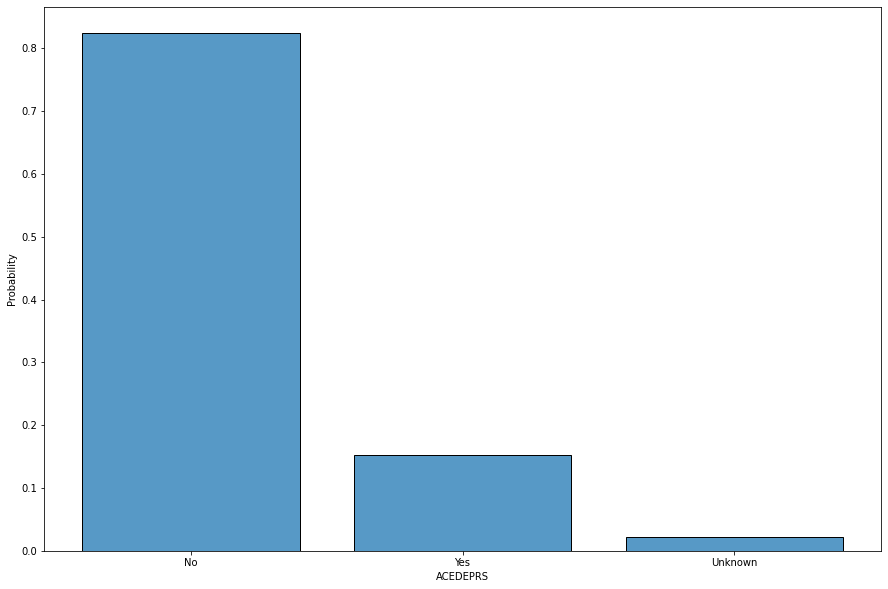

In [114]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', stat='probability', discrete=True, shrink=0.8)

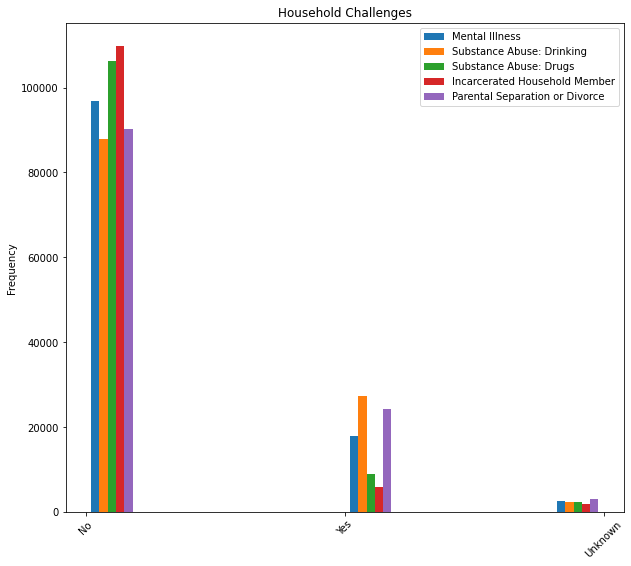

In [88]:
plt.figure(figsize=(10, 9))
plt.title('Household Challenges')
plt.hist(x=[brfss_total['ACEDEPRS'], 
            brfss_total['ACEDRINK'],
            brfss_total['ACEDRUGS'], 
            brfss_total['ACEPRISN'],
            brfss_total['ACEDIVRC']])
plt.ylabel('Frequency')
plt.legend(labels=['Mental Illness', 'Substance Abuse: Drinking', 'Substance Abuse: Drugs', 
                   'Incarcerated Household Member', 'Parental Separation or Divorce'], loc='best')
plt.xticks(rotation=45);
plt.savefig('household_challenges.jpeg')

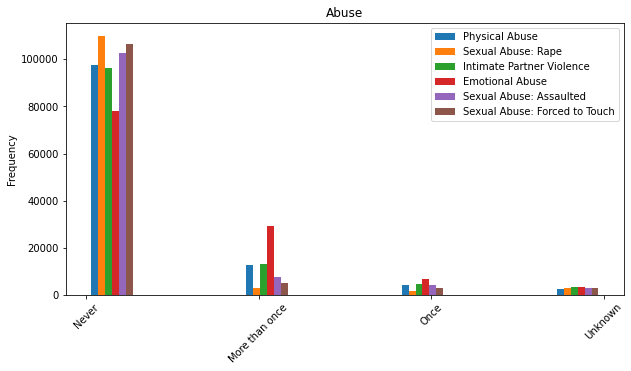

In [89]:
plt.figure(figsize=(10, 5))
plt.title('Abuse')
plt.hist(x=[brfss_total['ACEHURT'], 
            brfss_total['ACEHVSEX'],
            brfss_total['ACEPUNCH'], 
            brfss_total['ACESWEAR'],
            brfss_total['ACETOUCH'],
            brfss_total['ACETTHEM']])
plt.ylabel('Frequency')
plt.legend(labels=['Physical Abuse', 'Sexual Abuse: Rape', 'Intimate Partner Violence', 
                   'Emotional Abuse', 'Sexual Abuse: Assaulted', 'Sexual Abuse: Forced to Touch'])
plt.xticks(rotation=45);
plt.savefig('abuse.jpeg')

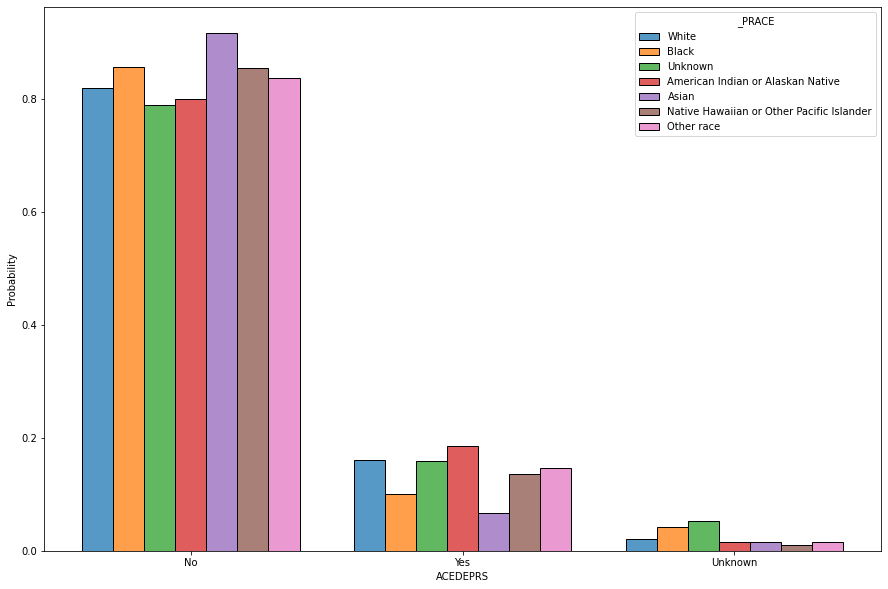

In [108]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', hue='_PRACE', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)

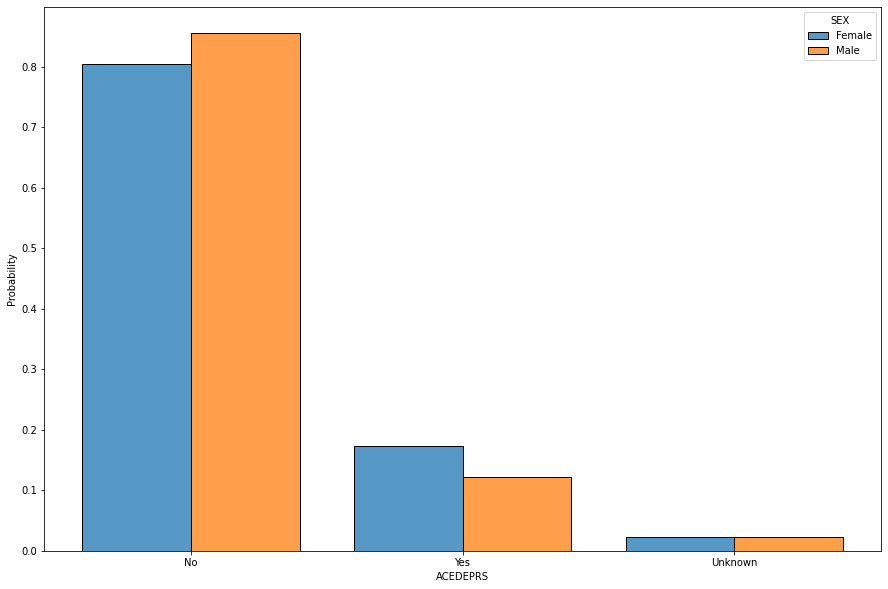

In [109]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', hue='SEX', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)

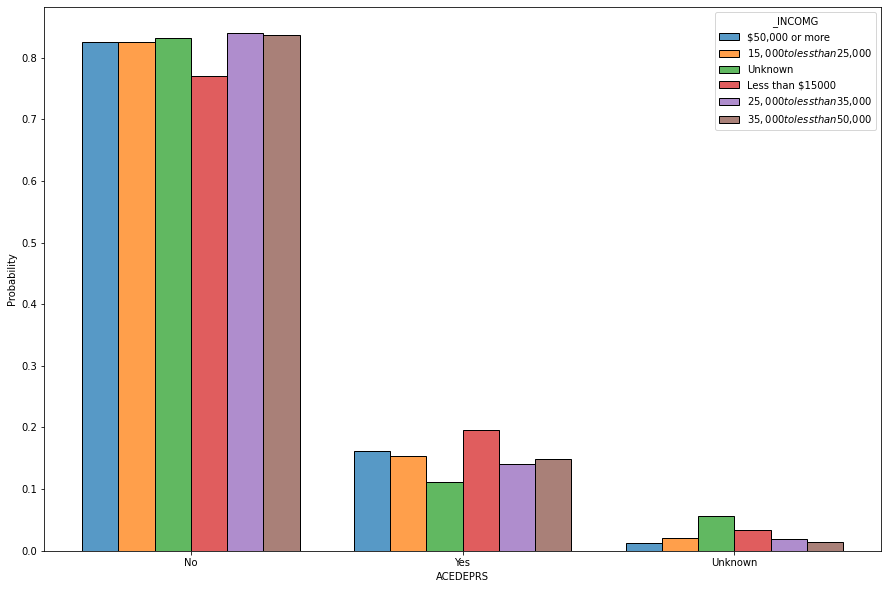

In [110]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', hue='_INCOMG', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)

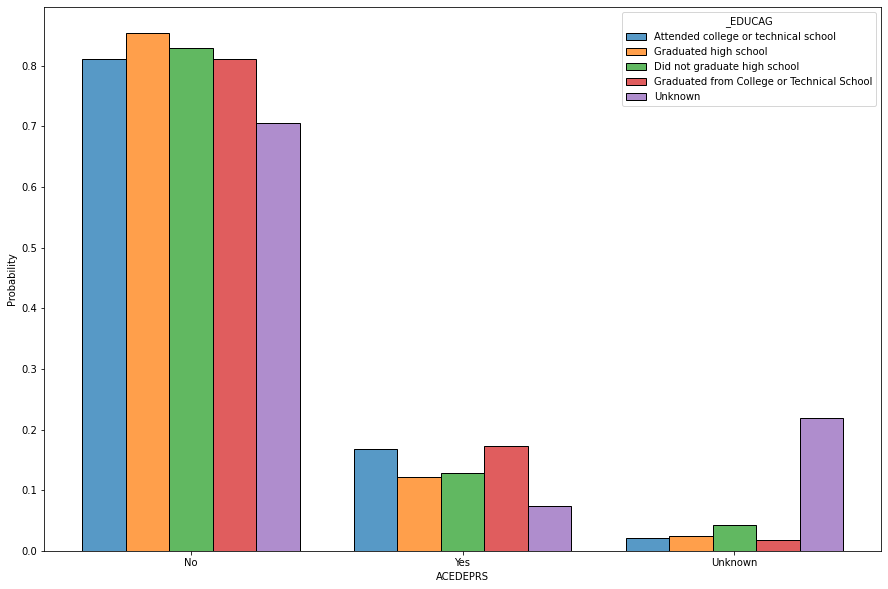

In [111]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', hue='_EDUCAG', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)